In [1]:
# loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc

In [2]:
# loading data files
customers = pd.read_csv('~/consulting_analysis_vIsuals/data/customers.csv')
contracts = pd.read_csv('~/consulting_analysis_vIsuals/data/contracts.csv')
contracts
customers

,id,company,sector,industry,email,address,city,state,zip
0,1,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,2,Izio,Energy,Oil & Gas Production,farlet1@comcast.net,15360 Village Green Street,Spokane,WA,99252
2,3,Twitterworks,NaN,NaN,alerohan2@ox.ac.uk,29 Hovde Hill,Milwaukee,WI,53234
3,4,Viva,Health Care,Major Pharmaceuticals,wgiovanitti3@nytimes.com,074 Center Place,Topeka,KS,66667
4,5,Jabberstorm,Technology,Computer Software: Prepackaged Software,pscallon4@fc2.com,4 Moose Way,Terre Haute,IN,47805
...,...,...,...,...,...,...,...,...,...
245,246,Livefish,Energy,Oilfield Services/Equipment,gcressy6t@twitter.com,05019 Eastwood Alley,Brooksville,FL,34605
246,247,Katz,NaN,NaN,siacobini6u@fc2.com,6567 Old Shore Center,Omaha,NE,68134
247,248,Yombu,Public Utilities,Natural Gas Distribution,ccandy6v@tumblr.com,6442 Vahlen Avenue,Salt Lake City,UT,84125
248,249,Dynazzy,NaN,NaN,lmothersole6w@nsw.gov.au,15 Oakridge Court,New York City,NY,10060


In [3]:
# idea is to understand contracts belong to which state and city
combined_data = pd.merge(contracts, customers[['id', 'state', 'city']], left_on = 'customer_id', right_on = 'id', how = 'left')
combined_data

,contract_id,customer_id,contract_start,contract_term,deposit,monthly_amt,id,state,city
0,1,127,8/17/2019,12,"$53,000.00","$11,600.00",127,ID,Boise
1,2,119,12/1/2019,22,"$77,000.00","$14,600.00",119,KY,Lexington
2,3,160,5/1/2019,15,"$13,000.00","$22,800.00",160,MS,Meridian
3,4,7,12/8/2019,23,"$56,000.00","$11,400.00",7,TX,El Paso
4,5,144,2/11/2019,7,"$21,000.00","$19,800.00",144,AZ,Phoenix
...,...,...,...,...,...,...,...,...,...
995,996,57,11/8/2019,15,"$38,000.00","$5,300.00",57,NE,Lincoln
996,997,126,1/13/2019,20,"$28,000.00","$16,000.00",126,MD,Baltimore
997,998,89,5/8/2019,7,"$73,000.00","$18,400.00",89,WA,Olympia
998,999,52,3/26/2019,7,"$63,000.00","$21,600.00",52,KS,Topeka


In [4]:
# calculating number of contracts per state
state_contracts = combined_data.groupby('state')['customer_id'].count().nlargest(len(combined_data['state'].unique())).reset_index().rename(columns = {'state':'State', 'customer_id':'Number of Contracts'})
state_contracts

,State,Number of Contracts
0,TX,104
1,CA,88
2,FL,70
3,WA,54
4,NY,43
5,KS,43
6,VA,35
7,OK,34
8,CO,34
9,OH,33


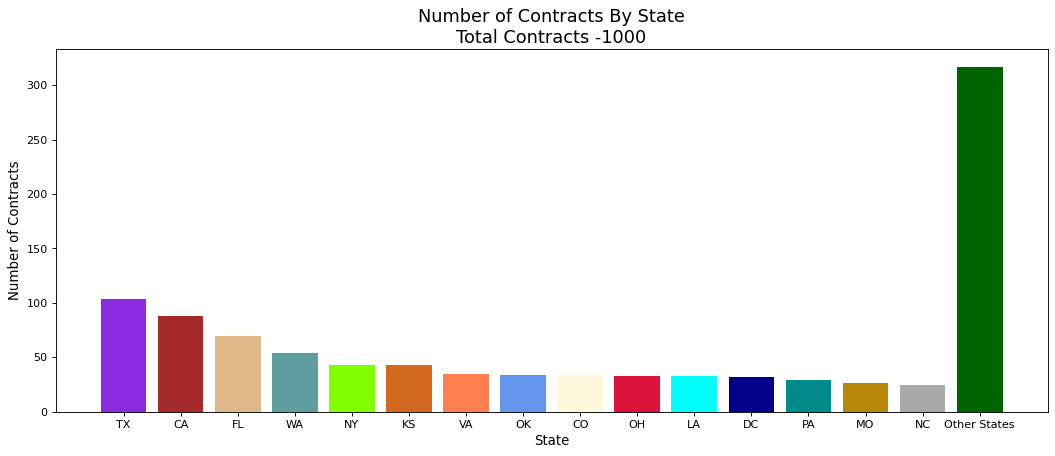

In [5]:

def visualise_all_states(N = 15):
    # we will analyse top 15 states and all other will be clubbed under 'Other States' label
    top_state_contracts = state_contracts[:N]
    top_state_contracts = top_state_contracts.append({'State':'Other States', 'Number of Contracts':sum(state_contracts['Number of Contracts'][N:])}, ignore_index = True)
    # bar plot - visualize top states
    bar_cols = [x for x,y in pltc.cnames.items()][10:10+len(top_state_contracts)]
    plt.figure(figsize=(16, 6), dpi=80)
    plt.bar(top_state_contracts['State'],top_state_contracts['Number of Contracts'], color = bar_cols)
    plt.title('Number of Contracts By State\nTotal Contracts -'+str(sum(top_state_contracts['Number of Contracts'])), fontsize=16)
    plt.xlabel('State', fontsize=12)
    plt.ylabel('Number of Contracts', fontsize=12)
    if N > 15:
        plt.xticks(rotation='vertical')
    plt.show();
    
visualise_all_states(N=15)



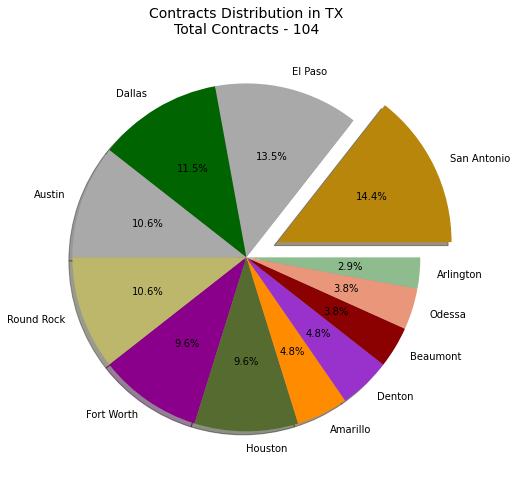

In [7]:
def visualise_top_state(explore_city = state_contracts['State'][0]):
    # identifying top state and further exploring its cities
    topState_data = combined_data[combined_data['state'] == explore_city]
    # calculating number of contracts per city
    city_contracts = topState_data.groupby('city')['customer_id'].count().nlargest(len(combined_data['city'].unique())).reset_index().rename(columns = {'city':'City', 'customer_id':'Number of Contracts'})

    # pie chart - visualise top cities
    contracts_city = np.array(city_contracts['Number of Contracts'])
    max_explode = ((contracts_city == max(contracts_city)).astype(int)/5).tolist()
    pie_cols = [x for x,y in pltc.cnames.items()][23:23+len(contracts_city)]
    plt.figure(figsize=(8,8))
    plt.pie(contracts_city, labels=list(city_contracts['City']), autopct='%1.1f%%', 
            shadow=True, explode=max_explode, colors=pie_cols)
    plt.title('Contracts Distribution in '+str(explore_city)+'\nTotal Contracts - '+str(sum(contracts_city)), fontsize=14)
    plt.show()
    
visualise_top_state(explore_city = 'TX')


What does the graphs show?
Bar Plot
The graph shows the number of contracts company has by state, starting from 2019. We can see that the top states are Texas, California, Florida, Washington and New York. Texas has relatively large number of contracts compared to other top states and has more than 10% business contribution in terms of contract count.

Pie Chart
The pie chart title shows the state analysed and also the total number of contracts in that state. In the pie chart, the city with maximum number of contracts is highlighted by breaking that slice out from the pie chart. For example, in the chart above, San Antonio has the maximum number of contracts and hence it is highlighted by lifting its slice. The pie chart shows all the cities under the input state and helps us understand what cities contribute more towards the company's business. San Antonio has the maximum number of clients in Texas followed by El Paso and Dallas.

Why it is important?
The bar chart is very important from the perspective of understanding the states having more number of contracts. From the chart we can see that our top 5 states are spread under West, Central and East America. After setting up our headquarter, the major issue that employees will face will be associated with travelling to client sites. So, a better understanding our clients and their locations will help in deciding the headquarter location so that the company can keep their clients as well their employees happy.

On the same level, understanding where most of our clients are situated within our state can further help in making a sound decision while finalising the headquarter location for the business.

What it means for the business?
From the business viewpoint, we know that the employees will have to travel to West Coast as well as East Coast since there are clients from California to Florida. a very good point from our initial analysis is that maximum contracts are from Texas which falls under Central America. Having headquarters in Central America would be a great choice as most of the clients will be situated with the state and travel time to cities on either of the Coast will also be less.

Another favorable point for setting up headquarters in Texas is that the cost of living is significantly less as compared to other states in Top 5. This would mean that the cost of opreating business would be much less in Texas and thus the company can earn more profits. The lesser travelling cost by setting up base in Texas will also help in improving business's profitability in coming years.

Within Texas, we see that San Antonio, El Paso and Dallas are major cities and these cities have most of the clients. Thus, the business can explore options in these major cities in Texas for setting up their headquarters.

Any action items the business should take with this knowlege?
Now, as we have gained significant insights that cities such as San Antonio, El Paso and Dallas are good options in Texas for the business to setup their headquarters, the company can further analyse several factors associated with setting up headquarters.

The business can analyse costs related to purchasing or leasing land, housing cost etc. Other factors to consider would be the connectivity from the city to cliet sites. Frequent and cheap flights to and from the headquarter city can significantly reduce travel cost and will also bring more flexibility for the employees.

All these aspects can be further analysed by the business before finalising their headquarter location.